In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.utils import to_categorical
import cv2

#read image path
import pathlib

import imageio
import matplotlib.image as img

#for data processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Read Dataset Folders**

In [3]:
#read data path
data_path = pathlib.Path('/kaggle/input/rice-image-dataset/Rice_Image_Dataset')

In [4]:
#read 5 folders in data_path
arborio = list(data_path.glob('Arborio/*'))
basmati = list(data_path.glob('Basmati/*'))
ipsala = list(data_path.glob('Ipsala/*'))
jasmine = list(data_path.glob('Jasmine/*'))
karacadag = list(data_path.glob('Karacadag/*'))

In [5]:
#dictionary of folder names
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag' : karacadag  
}

## **Visulaize Sample From Data**

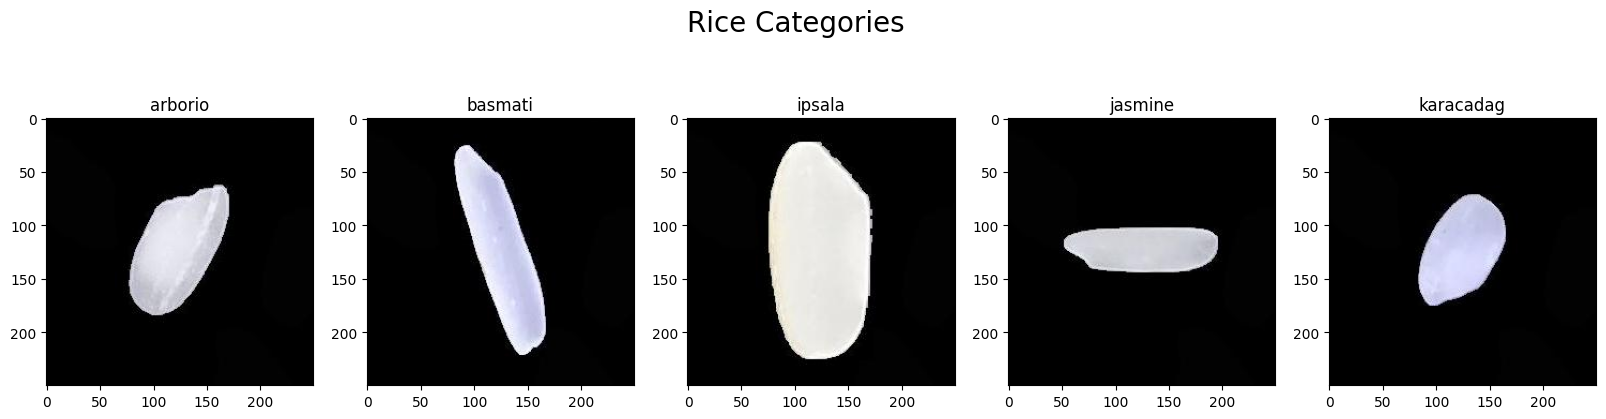

In [6]:
fig, ax = plt.subplots(ncols = 5, figsize = (20,5))
fig.suptitle("Rice Categories", fontsize = 20)

#read one image from each class (folder)
img_arborio = img.imread(arborio[0])
img_basmati = img.imread(basmati[0])
img_ipsala = img.imread(ipsala[0])
img_jasmine = img.imread(jasmine[0])
img_karacadag = img.imread(karacadag[0])

for index, name in enumerate(list(data.keys())):
    ax[index].set_title(name)

#show 5 images in subplots
ax[0].imshow(img_arborio)
ax[1].imshow(img_basmati)
ax[2].imshow(img_ipsala)
ax[3].imshow(img_jasmine)
ax[4].imshow(img_karacadag)

## **Data Preprocessing**

In [9]:
#sacling data ---> image * 1/255 , split data , test size = 0.2
data_generator = ImageDataGenerator(rescale = 1./ 255,
                                   validation_split = 0.2)

In [10]:
#apply data_generator on train data 
train_data = data_generator.flow_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = True,
                                               subset = 'training')

Found 60000 images belonging to 5 classes.


In [11]:
#apply data_generator on test data
test_data = data_generator.flow_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
                                              target_size = (224, 224),
                                              batch_size = 1,
                                              class_mode = 'categorical',
                                              shuffle = True,
                                              subset = 'validation')

Found 15000 images belonging to 5 classes.


## **Model Building**

In [20]:
model = Sequential()

#input layer
model.add(tf.keras.layers.Flatten())

#hidden layers
model.add(tf.keras.layers.Dense(256, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.keras.activations.relu))

#output lauer
model.add(tf.keras.layers.Dense(5, activation = tf.keras.activations.softmax))

## **Compile & Fit Model**

In [21]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [22]:
model.fit(train_data, validation_data = test_data, epochs = 1)

   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:25 46ms/step - accuracy: 0.2899 - loss: 3.6040 

W0000 00:00:1710509504.386347    1142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 424s 224ms/step - accuracy: 0.8926 - loss: 0.4211 - val_accuracy: 0.9744 - val_loss: 0.0759


## **Model Evaluation**

In [23]:
y_pred = model.predict(test_data)
y_pred

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step


array([[6.00084139e-04, 1.35692479e-09, 5.31713022e-06, 8.33134345e-06,
        9.99386191e-01],
       [1.02100823e-23, 9.99997020e-01, 4.11220500e-17, 3.03577758e-06,
        1.36905268e-21],
       [1.62008815e-02, 5.43491691e-02, 7.83802301e-04, 9.28597510e-01,
        6.85931518e-05],
       ...,
       [3.22598719e-11, 2.53016889e-01, 7.65173098e-08, 7.46983111e-01,
        9.84389978e-13],
       [1.64968820e-04, 4.03406258e-12, 2.92754443e-08, 3.41486697e-08,
        9.99834895e-01],
       [2.30467423e-10, 9.78056848e-01, 7.10074177e-09, 2.19430961e-02,
        1.11918226e-13]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred , axis = 1)
y_pred

array([4, 1, 3, ..., 3, 4, 1])

In [25]:
train_loss, train_accuracy = model.evaluate(train_data)

   4/1875 ━━━━━━━━━━━━━━━━━━━━ 1:35 51ms/step - accuracy: 1.0000 - loss: 0.0178 

W0000 00:00:1710510052.985566    1143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 91ms/step - accuracy: 0.9756 - loss: 0.0719


In [26]:
test_loss, test_accuracy = model.evaluate(test_data)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9721 - loss: 0.0777
